## Import Dependencies

In [23]:
# Import Dependencies
import pandas as pd
import matplotlib.pyplot as plt
import json
import os

## Retrieve the Stock data

In [24]:
# Set stock data csv file path
stock_data_url = os.path.join("Resources","stock_data.csv")

# Read the Stock data from CSV file into dataframe
stock_data_df = pd.read_csv(stock_data_url)
stock_data_df

,Symbol,Name,2019-12-31,2020-03-31,2020-06-30,2020-10-09
0,A,"Agilent Technologies, Inc. Common Stock",85.309998,71.620003,88.370003,105.760002
1,AA,Alcoa Corporation Common Stock,21.510000,6.160000,11.240000,12.520000
2,AAA,Listed Funds Trust AAF First Priority CLO Bond...,NaN,NaN,NaN,24.895000
3,AAAU,Perth Mint Physical Gold ETF,15.150000,15.720000,17.780001,19.219999
4,AACG,ATA Creativity Global - American Depositary Sh...,1.360000,0.950000,1.260000,1.080000
...,...,...,...,...,...,...
9158,ZUO,"Zuora, Inc. Class A Common Stock",14.330000,8.050000,12.750000,11.060000
9159,ZVO,Zovio Inc. - Common Stock,2.060000,1.650000,3.060000,4.530000
9160,ZYME,Zymeworks Inc. Common Shares,45.459999,35.470001,36.070000,47.099998
9161,ZYNE,"Zynerba Pharmaceuticals, Inc. - Common Stock",6.040000,3.830000,3.370000,3.680000


## Data Cleanup

* Remove NaNs
* Rename Column Names

In [25]:
# Doing data cleanup, and dropping the bad record:
cleaned_stock_df = stock_data_df.dropna(how='any')

In [26]:
# Checking if cleaning dataframe function has produced desired results:
cleaned_stock_df.count()

Symbol        7608
Name          7608
2019-12-31    7608
2020-03-31    7608
2020-06-30    7608
2020-10-09    7608
dtype: int64

In [27]:
# Using the (.shape) function to see the shape of dataframe: 
cleaned_stock_df.shape

(7608, 6)

In [28]:
# The stock cleaned dataframe:
cleaned_stock_df.head()

,Symbol,Name,2019-12-31,2020-03-31,2020-06-30,2020-10-09
0,A,"Agilent Technologies, Inc. Common Stock",85.309998,71.620003,88.370003,105.760002
1,AA,Alcoa Corporation Common Stock,21.510000,6.160000,11.240000,12.520000
3,AAAU,Perth Mint Physical Gold ETF,15.150000,15.720000,17.780001,19.219999
4,AACG,ATA Creativity Global - American Depositary Sh...,1.360000,0.950000,1.260000,1.080000
8,AADR,AdvisorShares Dorsey Wright ADR ETF,53.889999,40.340000,52.990002,57.990002


In [29]:
# Renaming the cleaned stock dataframe columns: 
renamed_df= cleaned_stock_df.rename(columns={'2019-12-31': 'Pre_COVID',
                                    '2020-03-31': 'Mar_2020',
                                    '2020-06-30': 'Jun_2020',
                                    '2020-10-09': 'Oct_2020'})
renamed_df.head()

,Symbol,Name,Pre_COVID,Mar_2020,Jun_2020,Oct_2020
0,A,"Agilent Technologies, Inc. Common Stock",85.309998,71.620003,88.370003,105.760002
1,AA,Alcoa Corporation Common Stock,21.510000,6.160000,11.240000,12.520000
3,AAAU,Perth Mint Physical Gold ETF,15.150000,15.720000,17.780001,19.219999
4,AACG,ATA Creativity Global - American Depositary Sh...,1.360000,0.950000,1.260000,1.080000
8,AADR,AdvisorShares Dorsey Wright ADR ETF,53.889999,40.340000,52.990002,57.990002


In [30]:
# Setting the index for renamed stock dataframe:
renamed_df = renamed_df.reset_index()
renamed_df = renamed_df[["Symbol","Name","Pre_COVID","Mar_2020","Jun_2020","Oct_2020"]]
renamed_df

,Symbol,Name,Pre_COVID,Mar_2020,Jun_2020,Oct_2020
0,A,"Agilent Technologies, Inc. Common Stock",85.309998,71.620003,88.370003,105.760002
1,AA,Alcoa Corporation Common Stock,21.510000,6.160000,11.240000,12.520000
2,AAAU,Perth Mint Physical Gold ETF,15.150000,15.720000,17.780001,19.219999
3,AACG,ATA Creativity Global - American Depositary Sh...,1.360000,0.950000,1.260000,1.080000
4,AADR,AdvisorShares Dorsey Wright ADR ETF,53.889999,40.340000,52.990002,57.990002
...,...,...,...,...,...,...
7603,ZUO,"Zuora, Inc. Class A Common Stock",14.330000,8.050000,12.750000,11.060000
7604,ZVO,Zovio Inc. - Common Stock,2.060000,1.650000,3.060000,4.530000
7605,ZYME,Zymeworks Inc. Common Shares,45.459999,35.470001,36.070000,47.099998
7606,ZYNE,"Zynerba Pharmaceuticals, Inc. - Common Stock",6.040000,3.830000,3.370000,3.680000


## Overview table that summarizes key metrics about each business, including:

* Symbol
* Name
* Pre-COVID Stock Value
* March 2020 Stock Value
* June 2020 Stock Value
* October 2020 Stock Value
* Pre-COVID % Change
* March 2020 % Change
* June 2020 % Change
* Post-COVID % Change (October 2020)
* Create a dataframe to hold the above results

In [31]:
# Calculating the percentage of change for each time period we are assessing:

# Setting PreCovid = 0 for plotting purposes:
renamed_df["Pre COVID % Change"] = 0

# Calculating the percentage change that occured over the period from December 2019 to the end of March 2020:
renamed_df["Mar 2020 % Change"] = (renamed_df["Mar_2020"] - renamed_df["Pre_COVID"])/renamed_df["Pre_COVID"]*100
renamed_df["Mar 2020 % Change"]

# Calculating the percentage change that occured over the period from March 2020 to the end of June 2020:
renamed_df["June 2020 % Change"] = (renamed_df["Jun_2020"] - renamed_df["Pre_COVID"])/renamed_df["Pre_COVID"]*100
renamed_df["June 2020 % Change"]

# Calculating the percentage change that occured over the period from June 2020 to the end of October 2020:
renamed_df["Oct 2020 % Change"] = (renamed_df["Oct_2020"] - renamed_df["Pre_COVID"])/renamed_df["Pre_COVID"]*100
renamed_df["Oct 2020 % Change"]

0        23.971404
1       -41.794513
2        26.864685
3       -20.588233
4         7.608095
           ...    
7603    -22.819257
7604    119.902929
7605      3.607566
7606    -39.072846
7607    150.698854
Name: Oct 2020 % Change, Length: 7608, dtype: float64

In [32]:
# I confirmed that all the columns, which contain the percent changes, were correctly assigned in the dataframe:
renamed_df.head()

,Symbol,Name,Pre_COVID,Mar_2020,Jun_2020,Oct_2020,Pre COVID % Change,Mar 2020 % Change,June 2020 % Change,Oct 2020 % Change
0,A,"Agilent Technologies, Inc. Common Stock",85.309998,71.620003,88.370003,105.760002,0,-16.047351,3.586924,23.971404
1,AA,Alcoa Corporation Common Stock,21.510000,6.160000,11.240000,12.520000,0,-71.362158,-47.745236,-41.794513
2,AAAU,Perth Mint Physical Gold ETF,15.150000,15.720000,17.780001,19.219999,0,3.762381,17.359743,26.864685
3,AACG,ATA Creativity Global - American Depositary Sh...,1.360000,0.950000,1.260000,1.080000,0,-30.147060,-7.352943,-20.588233
4,AADR,AdvisorShares Dorsey Wright ADR ETF,53.889999,40.340000,52.990002,57.990002,0,-25.143810,-1.670064,7.608095


## Top Performing Businesses (By Post-COVID Profit % Change)


* Sort and display the top ten performing businesses by Post-COVID Profit % change.

In [33]:
# Sorting the percent change in the value of the stocks from highest to lowest: 
renamed_df_sorted = renamed_df.sort_values("Oct 2020 % Change", ascending=False)
renamed_df_sorted

,Symbol,Name,Pre_COVID,Mar_2020,Jun_2020,Oct_2020,Pre COVID % Change,Mar 2020 % Change,June 2020 % Change,Oct 2020 % Change
4892,NVAX,"Novavax, Inc. - Common Stock",3.980000,13.580,83.349998,111.220001,0,241.206027,1994.221057,2694.472379
7276,VXRT,"Vaxart, Inc. - Common Stock",0.350000,1.770,8.850000,7.290000,0,405.714289,2428.571581,1982.857167
1357,CODX,"Co-Diagnostics, Inc. - Common Stock",0.895000,7.620,19.350000,14.420000,0,751.396653,2062.011262,1511.173227
7270,VVPR,VivoPower International PLC - Ordinary Shares,1.050000,0.740,1.320000,16.280001,0,-29.523805,25.714296,1450.476326
6774,TRIL,Trillium Therapeutics Inc. - Common Shares,1.030000,4.040,8.090000,15.370000,0,292.233017,685.436930,1392.233040
...,...,...,...,...,...,...,...,...,...,...
4949,OAS,Oasis Petroleum Inc. - Common Stock,3.260000,0.350,0.750000,0.160000,0,-89.263804,-76.993865,-95.092025
3756,JDST,Direxion Daily Junior Gold Miners Index Bear 2...,244.500000,67.750,16.980000,9.620000,0,-72.290389,-93.055215,-96.065440
4823,NRGU,MicroSectors U.S. Big Oil Index 3X Leveraged ETN,47.147999,2.214,4.080000,1.660000,0,-95.304149,-91.346399,-96.479172
6396,SRRA,"Sierra Oncology, Inc. - Common Stock",547.200012,9.820,12.100000,11.750000,0,-98.205409,-97.788743,-97.852705


In [34]:
# Find the Top 10 businesses that has most profit
top_10_business_df = renamed_df_sorted.head(10)
top_10_business_df.style.format({"Mar 2020 % Change": "{:.0f}%",
                                 "June 2020 % Change": "{:.0f}%",
                                 "Oct 2020 % Change": "{:.0f}%"})

,Symbol,Name,Pre_COVID,Mar_2020,Jun_2020,Oct_2020,Pre COVID % Change,Mar 2020 % Change,June 2020 % Change,Oct 2020 % Change
4892,NVAX,"Novavax, Inc. - Common Stock",3.980000,13.580000,83.349998,111.220001,0,241%,1994%,2694%
7276,VXRT,"Vaxart, Inc. - Common Stock",0.350000,1.770000,8.850000,7.290000,0,406%,2429%,1983%
1357,CODX,"Co-Diagnostics, Inc. - Common Stock",0.895000,7.620000,19.350000,14.420000,0,751%,2062%,1511%
7270,VVPR,VivoPower International PLC - Ordinary Shares,1.050000,0.740000,1.320000,16.280001,0,-30%,26%,1450%
6774,TRIL,Trillium Therapeutics Inc. - Common Shares,1.030000,4.040000,8.090000,15.370000,0,292%,685%,1392%
1432,CRDF,"Cardiff Oncology, Inc. - Common Stock",1.240000,1.010000,5.010000,17.250000,0,-19%,304%,1291%
5222,PEIX,"Pacific Ethanol, Inc. - Common Stock",0.650000,0.260000,0.710000,8.830000,0,-60%,9%,1258%
4765,NLS,"Nautilus, Inc. Common Stock",1.750000,2.610000,9.270000,22.100000,0,49%,430%,1163%
5079,OSTK,"Overstock.com, Inc. - Common Stock",7.050000,4.990000,28.430000,83.230003,0,-29%,303%,1081%
2930,GNPX,"Genprex, Inc. - Common Stock",0.320000,2.420000,3.140000,3.750000,0,656%,881%,1072%


## Bottom Performing Businesses (By Post-COVID Profit % Change)

* Sort and display the ten worst-performing businesses by Post-COVID Profit % change.

In [35]:
# Sorting the percent change in the value of the stocks from lowest to highest: 
renamed_df_sorted = renamed_df.sort_values("Oct 2020 % Change")
renamed_df_sorted

,Symbol,Name,Pre_COVID,Mar_2020,Jun_2020,Oct_2020,Pre COVID % Change,Mar 2020 % Change,June 2020 % Change,Oct 2020 % Change
3044,GUSH,Direxion Daily S&P Oil & Gas Exp. & Prod. Bull...,1462.000000,15.660,34.299999,24.170000,0,-98.928865,-97.653899,-98.346785
6396,SRRA,"Sierra Oncology, Inc. - Common Stock",547.200012,9.820,12.100000,11.750000,0,-98.205409,-97.788743,-97.852705
4823,NRGU,MicroSectors U.S. Big Oil Index 3X Leveraged ETN,47.147999,2.214,4.080000,1.660000,0,-95.304149,-91.346399,-96.479172
3756,JDST,Direxion Daily Junior Gold Miners Index Bear 2...,244.500000,67.750,16.980000,9.620000,0,-72.290389,-93.055215,-96.065440
4949,OAS,Oasis Petroleum Inc. - Common Stock,3.260000,0.350,0.750000,0.160000,0,-89.263804,-76.993865,-95.092025
...,...,...,...,...,...,...,...,...,...,...
6774,TRIL,Trillium Therapeutics Inc. - Common Shares,1.030000,4.040,8.090000,15.370000,0,292.233017,685.436930,1392.233040
7270,VVPR,VivoPower International PLC - Ordinary Shares,1.050000,0.740,1.320000,16.280001,0,-29.523805,25.714296,1450.476326
1357,CODX,"Co-Diagnostics, Inc. - Common Stock",0.895000,7.620,19.350000,14.420000,0,751.396653,2062.011262,1511.173227
7276,VXRT,"Vaxart, Inc. - Common Stock",0.350000,1.770,8.850000,7.290000,0,405.714289,2428.571581,1982.857167


In [36]:
# Find the Top 10 businesses that has least profit
bottom_10_business_df = renamed_df_sorted.head(10)
bottom_10_business_df.style.format({"Mar 2020 % Change": "{:.0f}%",
                                    "June 2020 % Change": "{:.0f}%",
                                    "Oct 2020 % Change": "{:.0f}%"})

,Symbol,Name,Pre_COVID,Mar_2020,Jun_2020,Oct_2020,Pre COVID % Change,Mar 2020 % Change,June 2020 % Change,Oct 2020 % Change
3044,GUSH,Direxion Daily S&P Oil & Gas Exp. & Prod. Bull 2X Shares,1462.000000,15.660000,34.299999,24.170000,0,-99%,-98%,-98%
6396,SRRA,"Sierra Oncology, Inc. - Common Stock",547.200012,9.820000,12.100000,11.750000,0,-98%,-98%,-98%
4823,NRGU,MicroSectors U.S. Big Oil Index 3X Leveraged ETN,47.147999,2.214000,4.080000,1.660000,0,-95%,-91%,-96%
3756,JDST,Direxion Daily Junior Gold Miners Index Bear 2X Shares,244.500000,67.750000,16.980000,9.620000,0,-72%,-93%,-96%
4949,OAS,Oasis Petroleum Inc. - Common Stock,3.260000,0.350000,0.750000,0.160000,0,-89%,-77%,-95%
877,BRZU,Direxion Daily Brazil Bull 2X Shares,1358.000000,53.200001,74.379997,72.239998,0,-96%,-95%,-95%
177,AHT,Ashford Hospitality Trust Inc Common Stock,27.900000,7.400000,7.200000,1.560000,0,-73%,-74%,-94%
2142,ERX,Direxion Energy Bull 2X Shares,175.000000,9.740000,15.090000,9.820000,0,-94%,-91%,-94%
6907,UCO,ProShares Ultra Bloomberg Crude Oil,511.500000,39.750000,28.680000,28.740000,0,-92%,-94%,-94%
6109,SHIP,Seanergy Maritime Holdings Corp - Common Stock,8.800000,2.400000,2.140000,0.510000,0,-73%,-76%,-94%


# Data Visualization

### Plot the Top 10 Businesses

#### Bar Plot
* Create a dataframe to hold only the columns needed for plotting.
* Create a bar plot for top 10 businesses with Oct 2020 Profit % Change.

#### Line Plot
* Create and transform the dataframe as required for generating line plot.
* Create a line plot for top 10 businesses with Pre COVID, Mar 2020, June 2020 and Oct 2020 Profit % Changes.

### Plot the Bottom 10 Businesses

#### Bar Plot
* Create a dataframe to hold only the columns needed for plotting.
* Create a bar plot for bottom 10 businesses with Oct 2020 Profit % Change.

#### Line Plot
* Create and transform the dataframe as required for generating line plot.
* Create a line plot for bottom 10 businesses with Pre COVID, Mar 2020, June 2020 and Oct 2020 Profit % Changes.

In [37]:
# Create a dataframe to hold only columns needed for plotting
top_10_df = top_10_business_df[["Symbol",
                                "Name",
                                "Pre COVID % Change", 
                                "Mar 2020 % Change",
                                "June 2020 % Change",
                                "Oct 2020 % Change"]]

# Rename columns
top_10_df = top_10_df.rename(columns={
    "Pre COVID % Change" : "Pre COVID",
    "Mar 2020 % Change" : "Mar 2020",
    "June 2020 % Change" : "June 2020",
    "Oct 2020 % Change" : "Oct 2020"
})

top_10_df

,Symbol,Name,Pre COVID,Mar 2020,June 2020,Oct 2020
4892,NVAX,"Novavax, Inc. - Common Stock",0,241.206027,1994.221057,2694.472379
7276,VXRT,"Vaxart, Inc. - Common Stock",0,405.714289,2428.571581,1982.857167
1357,CODX,"Co-Diagnostics, Inc. - Common Stock",0,751.396653,2062.011262,1511.173227
7270,VVPR,VivoPower International PLC - Ordinary Shares,0,-29.523805,25.714296,1450.476326
6774,TRIL,Trillium Therapeutics Inc. - Common Shares,0,292.233017,685.436930,1392.233040
1432,CRDF,"Cardiff Oncology, Inc. - Common Stock",0,-18.548388,304.032273,1291.129022
5222,PEIX,"Pacific Ethanol, Inc. - Common Stock",0,-60.000000,9.230770,1258.461577
4765,NLS,"Nautilus, Inc. Common Stock",0,49.142851,429.714312,1162.857165
5079,OSTK,"Overstock.com, Inc. - Common Stock",0,-29.219863,303.262405,1080.567392
2930,GNPX,"Genprex, Inc. - Common Stock",0,656.250041,881.250055,1071.875026


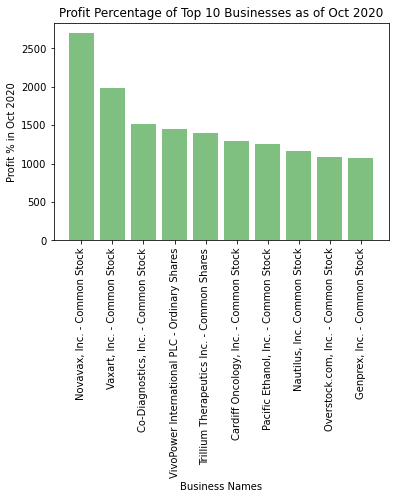

In [38]:
# Set x and y axis
x_axis = top_10_df["Name"]
y_axis = top_10_df["Oct 2020"]

# Generate bar plot
plt.bar(x_axis, y_axis, color='g', alpha=0.5, align="center")

# Set the orientation of the x axis labels
plt.xticks(rotation="vertical")

# Set the title, x axis and y axis labels
plt.xlabel("Business Names")
plt.ylabel("Profit % in Oct 2020")
plt.title("Profit Percentage of Top 10 Businesses as of Oct 2020")

# Save and display the bar plot
top_bar_file_path = os.path.join("Images","top_10_business_barplot.png")
plt.savefig(top_bar_file_path)
plt.show()

In [39]:
# Create a dataframe as required for generating line plot
del top_10_df["Symbol"]
top_10_df = top_10_df.set_index("Name")
top_10_t_df = top_10_df.transpose()
top_10_t_df = top_10_t_df.reset_index()
top_10_t_df

Name,index,"Novavax, Inc. - Common Stock","Vaxart, Inc. - Common Stock","Co-Diagnostics, Inc. - Common Stock",VivoPower International PLC - Ordinary Shares,Trillium Therapeutics Inc. - Common Shares,"Cardiff Oncology, Inc. - Common Stock","Pacific Ethanol, Inc. - Common Stock","Nautilus, Inc. Common Stock","Overstock.com, Inc. - Common Stock","Genprex, Inc. - Common Stock"
0,Pre COVID,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,Mar 2020,241.206027,405.714289,751.396653,-29.523805,292.233017,-18.548388,-60.000000,49.142851,-29.219863,656.250041
2,June 2020,1994.221057,2428.571581,2062.011262,25.714296,685.436930,304.032273,9.230770,429.714312,303.262405,881.250055
3,Oct 2020,2694.472379,1982.857167,1511.173227,1450.476326,1392.233040,1291.129022,1258.461577,1162.857165,1080.567392,1071.875026


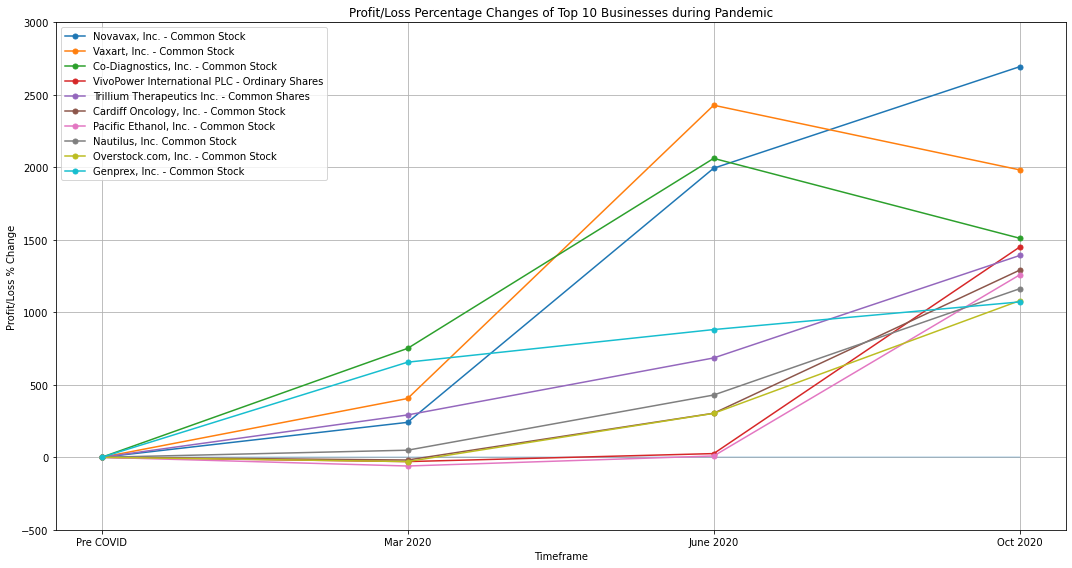

In [40]:
# Set plot size
plt.figure(figsize=(15,8))

# Generate line plot
for column_name in top_10_t_df.columns:
    if column_name != "index":
        plt.plot(top_10_t_df["index"], 
             top_10_t_df[column_name], 
             marker = "o", 
             markersize=5, 
             label=column_name)


# Draw a horizontal line with 0.25 transparency
plt.hlines(0, 0, 3, alpha=0.25)

# Adds a legend and sets its location to the lower right
plt.legend(loc="best")

# Set title, x and y labels 
plt.xlabel("Timeframe")
plt.ylabel("Profit/Loss % Change")
plt.title("Profit/Loss Percentage Changes of Top 10 Businesses during Pandemic")

plt.ylim(-500,3000)

# Add in a grid for the chart
plt.grid()

# Save and Display the line plot
plt.tight_layout()
top_line_file_path = os.path.join("Images","top_10_business_lineplot.png")
plt.savefig(top_line_file_path)
plt.show()

In [41]:
# Creating the dataframe to hold the necessary columns needed for plotting:
bottom_10_df = bottom_10_business_df[["Symbol",
                                    "Name",
                                    "Pre COVID % Change", 
                                    "Mar 2020 % Change",
                                    "June 2020 % Change",
                                    "Oct 2020 % Change"]]

# Rename columns for plotting:
bottom_10_df = bottom_10_df.rename(columns={
    "Pre COVID % Change" : "Pre COVID", 
    "Mar 2020 % Change" : "Mar 2020", 
    "June 2020 % Change" : "June 2020", 
    "Oct 2020 % Change" : "Oct 2020"
})

bottom_10_df

,Symbol,Name,Pre COVID,Mar 2020,June 2020,Oct 2020
3044,GUSH,Direxion Daily S&P Oil & Gas Exp. & Prod. Bull...,0,-98.928865,-97.653899,-98.346785
6396,SRRA,"Sierra Oncology, Inc. - Common Stock",0,-98.205409,-97.788743,-97.852705
4823,NRGU,MicroSectors U.S. Big Oil Index 3X Leveraged ETN,0,-95.304149,-91.346399,-96.479172
3756,JDST,Direxion Daily Junior Gold Miners Index Bear 2...,0,-72.290389,-93.055215,-96.065440
4949,OAS,Oasis Petroleum Inc. - Common Stock,0,-89.263804,-76.993865,-95.092025
877,BRZU,Direxion Daily Brazil Bull 2X Shares,0,-96.082474,-94.522828,-94.680413
177,AHT,Ashford Hospitality Trust Inc Common Stock,0,-73.476702,-74.193549,-94.408602
2142,ERX,Direxion Energy Bull 2X Shares,0,-94.434286,-91.377143,-94.388572
6907,UCO,ProShares Ultra Bloomberg Crude Oil,0,-92.228739,-94.392962,-94.381232
6109,SHIP,Seanergy Maritime Holdings Corp - Common Stock,0,-72.727272,-75.681818,-94.204546


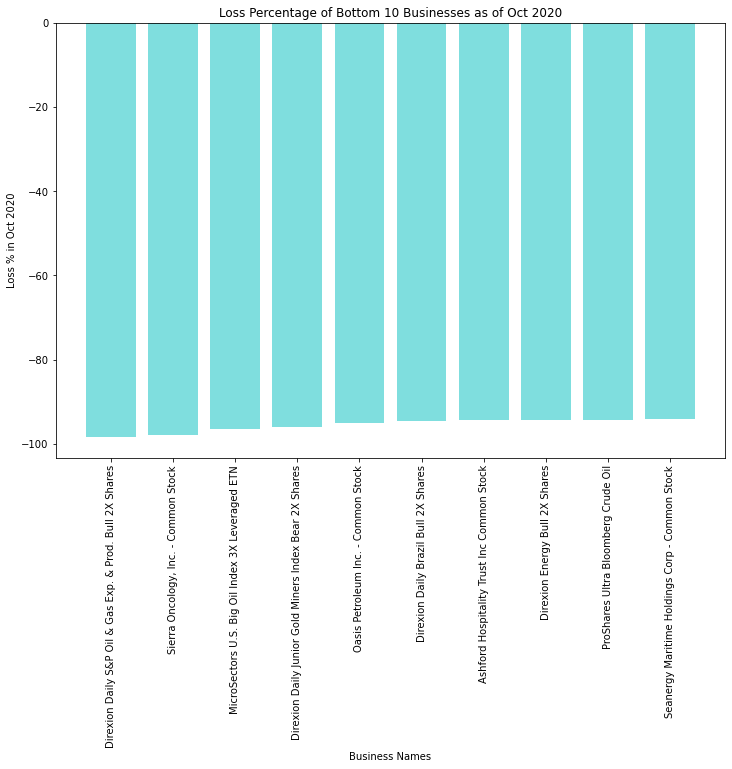

In [42]:
plt.figure(figsize=(12,8))

# Set x and y axis
x_axis = bottom_10_df["Name"]
y_axis = bottom_10_df["Oct 2020"]

# Generate bar plot
plt.bar(x_axis, y_axis, color='c', alpha=0.5, align="center")

# Set the orientation of the x axis labels
plt.xticks(rotation="vertical")

# Set the title, x axis and y axis labels
plt.xlabel("Business Names")
plt.ylabel("Loss % in Oct 2020")
plt.title("Loss Percentage of Bottom 10 Businesses as of Oct 2020")

# Save and display the bar plot
top_bar_file_path = os.path.join("Images","bottom_10_business_barplot.png")
plt.savefig("Images/bottom_10_business_barplot.png")


plt.show()

In [43]:
# Creating the required dataframe for genterating bottom 10 line plot:
del bottom_10_df["Symbol"]
bottom_10_df = bottom_10_df.set_index("Name")
bottom_10_df = bottom_10_df.transpose()
bottom_10_df = bottom_10_df.reset_index()
bottom_10_df

Name,index,Direxion Daily S&P Oil & Gas Exp. & Prod. Bull 2X Shares,"Sierra Oncology, Inc. - Common Stock",MicroSectors U.S. Big Oil Index 3X Leveraged ETN,Direxion Daily Junior Gold Miners Index Bear 2X Shares,Oasis Petroleum Inc. - Common Stock,Direxion Daily Brazil Bull 2X Shares,Ashford Hospitality Trust Inc Common Stock,Direxion Energy Bull 2X Shares,ProShares Ultra Bloomberg Crude Oil,Seanergy Maritime Holdings Corp - Common Stock
0,Pre COVID,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,Mar 2020,-98.928865,-98.205409,-95.304149,-72.290389,-89.263804,-96.082474,-73.476702,-94.434286,-92.228739,-72.727272
2,June 2020,-97.653899,-97.788743,-91.346399,-93.055215,-76.993865,-94.522828,-74.193549,-91.377143,-94.392962,-75.681818
3,Oct 2020,-98.346785,-97.852705,-96.479172,-96.065440,-95.092025,-94.680413,-94.408602,-94.388572,-94.381232,-94.204546


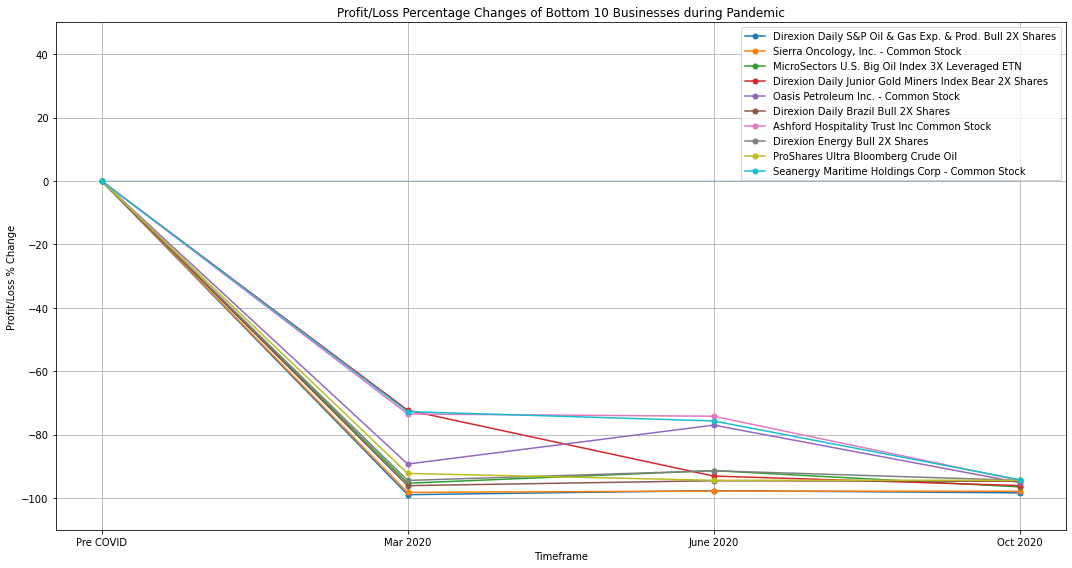

In [45]:
# Set plot size
plt.figure(figsize=(15,8))

# Generate line plot
for column_name in bottom_10_df.columns:
    if column_name != "index":
        plt.plot(bottom_10_df["index"],
                 bottom_10_df[column_name], 
                 marker = "o",
                 markersize=5,
                 label=column_name)
                       
        
# Draw a horizontal line with 0.25 transparency
plt.hlines(0, 0, 3, alpha=0.25)

# Adds a legend and sets its location to the lower right
plt.legend(loc="best")

# Set title, x and y labels 
plt.xlabel("Timeframe")
plt.ylabel("Profit/Loss % Change")
plt.title("Profit/Loss Percentage Changes of Bottom 10 Businesses during Pandemic")

plt.ylim(-110,50)

# Add in a grid for the chart
plt.grid()

# Save and Display the line plot
plt.tight_layout()
bottom_line_file_path = os.path.join("Images","bottom_10_business_lineplot.png")
plt.savefig(bottom_line_file_path)
plt.show()

# Top 10 Profiting Companies:
* Novavax, Inc. - Common Stock:  is an American vaccine development company 
* Vaxart, Inc. - Common Stock: is an American biotechnology company
* Co-Diagnostics, Inc. - Common Stock: is a molecular diagnostics company
* VivoPower International PLC - Ordinary Shares: is an international solar power company
* Trillium Therapeutics Inc. - Common Shares: is a clinical stage immuno-oncology company
* Cardiff Oncology, Inc. - Common Stock: is a clinical-stage Biotechnology company
* Pacific Ethanol, Inc. - Common Stock: is a leading producer and marketer of high quality alcohol products and low-carbon renewable fuels in the United States
* Nautilus, Inc. Common Stock: is amanufacturer of fitness equipment 
* Overstock.com, Inc. - Common Stock: is an American internet retailer 
* Genprex, Inc. - Common Stock: operates as a biotechnology company


# Top 10 Companies with Worst Losses:
* Direxion Daily S&P Oil & Gas Exp. & Prod. Bull 2X Shares: is an oil and gas production
* Sierra Oncology, Inc. - Common Stock: is a late stage drug development company 
* MicroSectors U.S. Big Oil Index 3X Leveraged ETN: is a group of oil producing companies
* Direxion Daily Junior Gold Miners Index Bear 2X Shares: indicates a group of gold & silver mining companies
* Oasis Petroleum Inc. - Common Stock:is a company engaged in hydrocarbon exploration and hydraulic fracturing 
* Direxion Daily Brazil Bull 2X Shares: Brazilian equity market 
* Ashford Hospitality Trust Inc Common Stock: real estate investment trust company
* Direxion Energy Bull 2X Shares: energy company
* ProShares Ultra Bloomberg Crude Oil: is an oil production company 
* Seanergy Maritime Holdings Corp - Common Stock: is a shipping company





![Bottom 10 Line Plot](Images/bottom_10_business_lineplot.png)